In [1]:
import numpy as np
import scipy.integrate as intg
import scipy.signal as sig
import os
import fnmatch as fm
import re
import scan_functions as sf
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

In [2]:
# importing the with O2 testing data as wox
# importing the without O2 testing data as nox
# data file path is to the two folders that are WITHIN the working directory
wox = dict()
nox = dict()
# the bad guys are the ones that dont have glass/flat on the left
bad_wox = np.array(['s3t4', 's3t5', 's3t6', 's6t1', 's6t2', 's6t3'])
# bad_nox = np.array(['']) dont think there are any, yay me :)
wox = sf.scan_dict(wox,'./al2o3_O2_testing_12-2-19/',bad_bois=bad_wox)
nox = sf.scan_dict(nox,'./al2o3_no-O2_testing_12-19-19/')
# make sure all data is in mircometers
wox = sf.make_x_micro(wox)
nox = sf.make_x_micro(nox)

In [3]:
# wox variables for 'sp_analysis_hard'
# will wanna revisit these after i apply new data adjustments
w_xfa = np.array([.4,.45,.45,.2,.4,
                  .4,.4,.45,.45,
                  .45,.3,.3,.25,.25,.25,
                  .4,.3,.35,.3,.4,
                  .4,.4,.5,.4,.4,.4,
                  .9,.45,.7,
                  .4,.3,.4,.4,.3,
                  .3,.3,.35,.4])
w_xib = np.array([.65,.7,.6,.8,.65,
                  .7,.55,.7,.6,
                 .65,.4,.55,.4,.45,.4,
                 .5,.45,.5,.6,.6,
                 .65,.55,.65,.6,.65,.55,
                 1.1,.6,.9,
                 .5,.45,.55,.6,.55,
                 .5,.45,.6,.65])
# w_xfb = np.array([(w_xib[i]+.4) for i in range(len(w_xib))])
w_xfb = np.array([1.2,.9,.8,1.2,1.,
                 1.,.95,1.4,1.3,
                 1.1,1.,.8,1.,1.,.8,
                 1.,.8,.65,1.1,.75,
                 1.7,.85,.9,.75,1.,1.05,
                 1.4,1.,1.05,
                 .7,.85,1.2,1.15,1.1,
                 .8,.85,.85,1.05])

In [4]:
# nox variables for 'sp_analysis_hard'
# sample: runs, this will help hella
# ^ 1:5, 2:6, 3:6, 4:6, 5:6, 6:6, 7:6, 8:5
# set that needs xia: s2t1
n_xfa = np.array([.55,.4,.4,.55,.65,
                 .45,.35,.4,.45,.45,.35,
                 .3,.35,.4,.4,.4,.4,
                 .5,.3,.3,.4,.4,.35,
                 .3,.3,.35,.45,.4,.4,
                 .35,.3,.3,.35,.4,.4,
                 .45,.35,.4,.3,.4,.3,
                 .4,.4,.4,.3,.3])
n_xib = np.array([.7,.5,.5,.7,.7,
                 .55,.45,.6,.65,.6,.55,
                 .5,.6,.6,.6,.65,.65,
                 .6,.6,.6,.55,.6,.55,
                 .45,.45,.45,.6,.6,.6,
                 .45,.45,.5,.55,.6,.55,
                 .6,.55,.6,.45,.55,.45,
                 .5,.55,.6,.45,.45])
n_xfb = np.array([1.3,1.35,1.35,1.6,1.65,
                 1.35,1.35,1.,1.7,1.7,1.,
                 1.35,1.,1.3,1.8,1.75,1.8,
                 1.75,1.75,1.75,1.4,1.,1.4,
                 1.4,1.4,1.4,1.75,1.7,1.75,
                 1.4,1.4,1.4,1.75,1.75,1.7,
                 1.75,.9,1.75,1.4,1.4,.6,
                 1.75,1.35,1.75,1.4,1.4])

In [5]:
# raw data key names
# dont run after changing the dict!
nox_key = np.array([key for key in nox])
wox_key = np.array([key for key in wox])

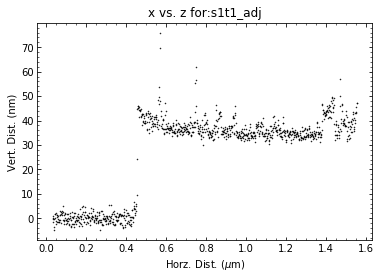

In [10]:
sf.key_plot(wox,'s1t1_adj')
# wox = sf.proj(wox,'s1t1',w_xfa[0])

height of  s1t1_adj  is: 36.1076720465646 +- 3.3959717069350543 nm


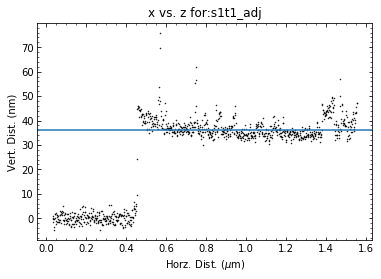

In [16]:
wox = sf.height(wox,'s1t1_adj',w_xfa[0],w_xib[0],w_xfb[0],result=True)

In [5]:
wox = sf.sp_analysis_hard(wox,8,w_xfa,w_xib,w_xfb)
nox = sf.sp_analysis_hard(nox,8,n_xfa,n_xib,n_xfb)

In [67]:
# the bad scans
bad_wox = np.array(['s1t3','s3t3','s3t4','s3t6','s4t2','s4t3','s4t4','s4t5','s5t2','s5t4','s6t1','s7t1','s8t1','s8t3'])
bad_nox = np.array(['s1t5','s2t1','s2t2','s2t4','s2t5','s3t1','s3t2','s3t3','s4t2','s4t4','s4t5','s5t3','s5t4','s5t5','s5t6','s6t1','s6t2','s6t4','s6t5','s7t1','s7t4','s7t5','s8t1','s8t3','s8t5'])

In [68]:
# np.array([key for key in wox if (np.any(bad_wox==key)==False) and (re.search('adj|h|_|avg',key)==None)])
bad_wox_h = np.array([bad_wox[i]+'_h' for i in range(len(bad_wox))])
bad_nox_h = np.array([bad_nox[i]+'_h' for i in range(len(bad_nox))])

In [69]:
good_nox = np.array([key for key in nox if (np.any(bad_nox==key)==False) and (re.search('adj|h|_|avg',key)==None)])
good_wox = np.array([key for key in wox if (np.any(bad_wox==key)==False) and (re.search('adj|h|_|avg',key)==None)])

In [70]:
good_nox_h = np.array([good_nox[i]+'_h' for i in range(len(good_nox))])
good_wox_h = np.array([good_wox[i]+'_h' for i in range(len(good_wox))])

In [71]:
wavg = np.arange(1,9)
wstd = np.zeros_like(wavg)
navg = np.arange(1,9)
nstd = np.zeros_like(navg)
n = np.arange(1,9)

In [72]:
wox_h = np.zeros(len(good_wox_h))
nox_h = np.zeros(len(good_nox_h))
for i in range(len(wox_h)):
    wox_h[i] = wox[good_wox_h[i]][0]
for i in range(len(nox_h)):
    nox_h[i] = nox[good_nox_h[i]][0]

In [73]:
nw = np.array([1,1,1,1,2,2,2,2,3,3,3,4,5,5,5,5,6,6,7,7,7,7,8,8])
nn = np.array([1,1,1,1,2,2,3,3,3,4,4,4,5,5,6,6,7,7,7,8,8])

In [74]:
# new wox avg and std
for i in range(len(n)):
    samp_str = 's'+str(n[i])+'.._h'
    s = 0.
    std = 0.
    cts = 0
    for j in range(len(good_wox_h)):
        if re.search(samp_str,good_wox_h[j]):
            s += wox[good_wox_h[j]][0]
            std += (wox[good_wox_h[j]][1])**2
            cts += 1
    wavg[i] = s/cts
    wstd[i] = np.sqrt(std)

In [75]:
# new nox avg and std
for i in range(len(n)):
    samp_str = 's'+str(n[i])+'.._h'
    s = 0.
    std = 0.
    cts = 0
    for j in range(len(good_nox_h)):
        if re.search(samp_str,good_nox_h[j]):
            s += nox[good_nox_h[j]][0]
            std += (nox[good_nox_h[j]][1])**2
            cts += 1
    navg[i] = s/cts
    nstd[i] = np.sqrt(std)

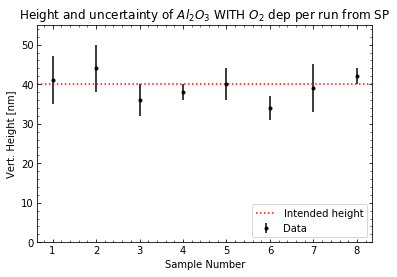

In [99]:
plt.figure();
plt.errorbar(n,wavg,yerr=wstd,fmt='k.',label='Data');
plt.axhline(40.,c='r',ls=':',label='Intended height');
plt.ylim((0,55.));
plt.xlabel('Sample Number');
plt.ylabel('Vert. Height [nm]');
plt.legend(loc='lower right');
plt.title('Height and uncertainty of $Al_{2}O_{3}$ WITH $O_2$ dep per run from SP');

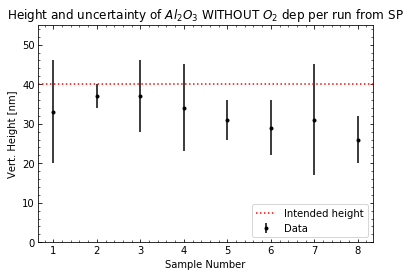

In [100]:
plt.figure();
plt.errorbar(n,navg,yerr=nstd,fmt='k.',label='Data');
plt.axhline(40.,c='r',ls=':',label='Intended height');
plt.ylim((0,55.));
plt.xlabel('Sample Number');
plt.ylabel('Vert. Height [nm]');
plt.legend(loc='lower right');
plt.title('Height and uncertainty of $Al_{2}O_{3}$ WITHOUT $O_2$ dep per run from SP');

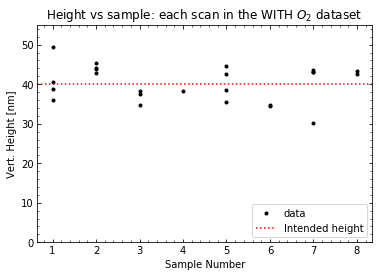

In [101]:
plt.figure();
plt.plot(nw,wox_h,'k.',label='data');
plt.axhline(40.,c='r',ls=':',label='Intended height');
plt.ylim((0,55));
plt.xlabel('Sample Number');
plt.ylabel('Vert. Height [nm]');
plt.legend(loc='lower right');
plt.title('Height vs sample: each scan in the WITH $O_2$ dataset');

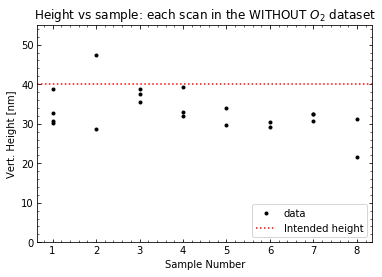

In [102]:
plt.figure();
plt.plot(nn,nox_h,'k.',label='data');
plt.axhline(40.,c='r',ls=':',label='Intended height');
plt.ylim((0,55));
plt.xlabel('Sample Number');
plt.ylabel('Vert. Height [nm]');
plt.legend(loc='lower right');
plt.title('Height vs sample: each scan in the WITHOUT $O_2$ dataset');

In [104]:
for i in range(len(good_wox_h)):
    print(wox[good_wox_h[i]])

(36.1076720465646, 3.3959717069350543)
(38.733268930375594, 1.9723043008303904)
(49.310700406114606, 3.57039545653828)
(40.617346991940146, 3.750733242724937)
(43.96694917467912, 1.5520286104225516)
(45.33303120884769, 4.802382743917624)
(42.86517343528051, 3.7379447494275984)
(43.942907225471636, 2.579009756927676)
(38.162420684524385, 2.9280074437252614)
(37.5036977678396, 2.8120607934463147)
(34.71365480474949, 2.5897824141414967)
(38.33699208636474, 2.8612604878751946)
(38.626445963162006, 2.354039975725079)
(35.54760332941575, 2.141117606603122)
(42.63649203752991, 1.9827494969345503)
(44.572648917805566, 3.095337617338188)
(34.53906408427254, 2.593400828786113)
(34.65950411576952, 2.368075365067617)
(42.98339173552578, 3.848743618984146)
(30.137724586458845, 2.6412980104083137)
(43.017546324802204, 1.8608871916865881)
(43.51465979249613, 3.556016303793862)
(42.46338586747362, 1.5516883537717623)
(43.36992240986621, 2.528170128937153)


In [105]:
for i in range(len(good_nox_h)):
    print(nox[good_nox_h[i]])

(30.119546543513245, 12.403114496864792)
(38.80767679823058, 3.230924846684405)
(30.652166491480134, 3.1854959212629073)
(32.6731979262225, 2.159601520769617)
(28.558550092381846, 2.4881690851903038)
(47.312270591691195, 3.023244826653424)
(35.369967569760554, 6.509028725485108)
(38.881965611120684, 5.008425594124125)
(37.589166780247794, 5.159210996811344)
(33.0794692015944, 6.4559083728615745)
(39.38859805436527, 7.044762448840662)
(31.842219002983118, 6.513828314521942)
(34.08176908321284, 5.17391903009296)
(29.61207368984893, 2.178321052444159)
(29.270671675849623, 7.272644701550349)
(30.46389608520153, 2.197415344363827)
(32.362336092844615, 6.277368588873168)
(30.76595844729315, 11.774617708980948)
(32.466340245329626, 4.965879484771634)
(31.12958019554905, 6.220587949527684)
(21.509486415679206, 2.7018173297144585)


In [24]:
avgkey_w = np.array([key for key in wox if (re.search('avg',key))])
avgkey_n = np.array([key for key in nox if (re.search('avg',key))])
wox_avg = np.array([wox[avgkey_w[i]][0] for i in range(len(avgkey_w))],dtype=float)
wox_std = np.array([wox[avgkey_w[i]][1] for i in range(len(avgkey_w))],dtype=float)
nox_avg = np.array([nox[avgkey_n[i]][0] for i in range(len(avgkey_n))],dtype=float)
nox_std = np.array([nox[avgkey_n[i]][1] for i in range(len(avgkey_n))],dtype=float)
# plt.errorbar()
n = np.arange(1,9)

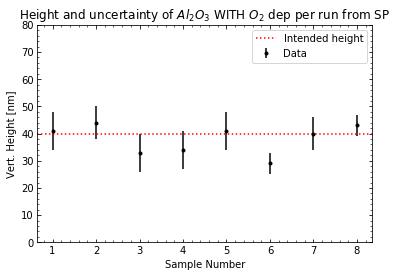

In [47]:
plt.figure();
plt.errorbar(n,wox_avg,yerr=wox_std,fmt='k.',label='Data');
plt.axhline(40.,c='r',ls=':',label='Intended height');
plt.ylim((0.,80))
plt.xlabel('Sample Number');
plt.ylabel('Vert. Height [nm]');
plt.legend(loc='best');
plt.title('Height and uncertainty of $Al_{2}O_{3}$ WITH $O_2$ dep per run from SP');

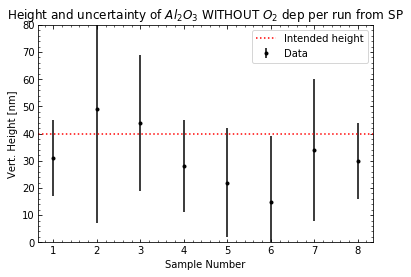

In [48]:
plt.figure();
plt.errorbar(n,nox_avg,yerr=nox_std,fmt='k.',label='Data');
plt.axhline(40.,c='r',ls=':',label='Intended height');
plt.ylim((0.,80))
plt.xlabel('Sample Number');
plt.ylabel('Vert. Height [nm]');
plt.legend(loc='best');
plt.title('Height and uncertainty of $Al_{2}O_{3}$ WITHOUT $O_2$ dep per run from SP');

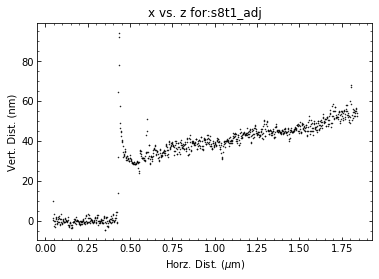

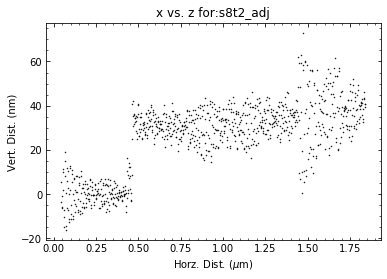

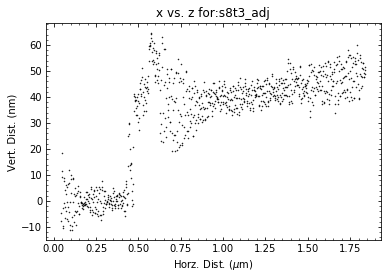

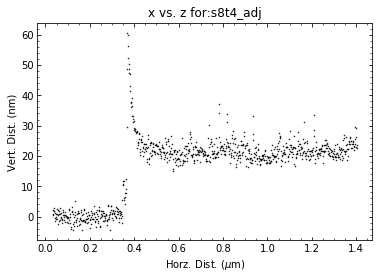

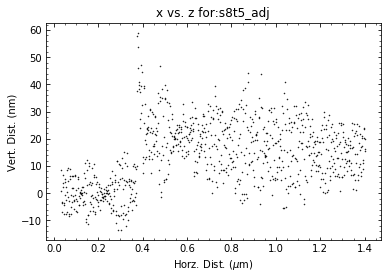

In [57]:
for key in nox:
    if (re.search('s8t._adj',key)):
        sf.key_plot(nox,key)
    else:
        continue

bad wox scans:

    - s1: t3
    - s2: 
    - s3: t3, t4, t6
    - s4: t1?, t2, t3,t5
    - s5: t2, t3?, t4, 
    - s6: t1, t2?, ALL BAD :( (for now keeping 2,3)
    - s7: t1, 
    - s8: t1?, t3?

bad nox scans:

    - s1: t5
    - s2: t1?, t2, t3?, t4?, t5, t6?
    - s3: t1, t2,t3,
    - s4: t2?, , t4, t5, t6
    - s5: t3, t4, t5, t6
    - s6: t1, t2, t3?, t4, t5
    - s7: t1, t2?, t3?, t4?, t5, t6
    - s8: t1, t2?, t3, t5
    
'?' means look at the scan params, or needs a second eye, or maybe wouldnt suck if it had some outlier removal

In [ ]:
# CHANGE THE OUTPUT OF 'PROJ' FROM TUPLE TO 2 ARRAYS
# testing rms calc
wox_rms = np.zeros_like(wox_key)
nox_rms = np.zeros_like(nox_key)
for i in range(len(wox_key)):
    wox_rms[i] = np.sqrt(np.sum(wox[wox_key[i]+'_adj'][1]**2)/len(wox[wox_key[i]+'_adj'][1]))
for i in range(len(nox_key)):
    nox_rms[i] = np.sqrt(np.sum(nox[nox_key[i]+'_adj'][1]**2)/len(nox[nox_key[i]+'_adj'][1]))

In [ ]:
# rms calculation, try on both raw and proj data
# rms = [(sum(Z(x)^2)/N)]^1/2
def rms(dick,key):
    '''
    calculates the rms of the data, this is the surface roughness
    works with the already established dictionary/sp system
    input:
    z - array, float - a [N,1] array of the vertical heights at each point, N is number of points
    output:
    rms - float - the roughness of the surface
    '''
    if key in dick:
        
    return rms

In [ ]:
# outlier removal